In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import math

import imblearn as im
from imblearn import under_sampling
from imblearn import over_sampling
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de datos

In [ ]:
DIR = "/content/drive/MyDrive/Colab Notebooks/Data Mining/TP Individual/content/"

df_train = pd.read_csv(DIR + "properati_entrenamiento.csv", index_col="id")
#df_train.head()

df_test = pd.read_csv(DIR + "properati_a_predecir.csv", index_col="id")
#df_test.head()

In [ ]:
df_train.dtypes

ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
l4                  object
l5                  object
l6                 float64
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
dtype: object

# Limpieza y transformación de datos

## Imputación de datos


In [ ]:
#Busco superfice en el titulo y reemplazos los blanks

df_train.loc[(df_train["surface_total"].isna()) & (df_train["title"].notna()), "surface_total"] = df_train.loc[(df_train["surface_total"].isna()) & (df_train["title"].notna()), 'title'].apply(lambda x, flags=re.IGNORECASE: int(re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:mts2|m2)", x, flags=re.IGNORECASE)[0].replace(".", "")) if re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:mts2|m2)", x, flags=re.IGNORECASE) else None)

df_test.loc[(df_test["surface_total"].isna()) & (df_test["title"].notna()), "surface_total"] = df_test.loc[(df_test["surface_total"].isna()) & (df_test["title"].notna()), 'title'].apply(lambda x, flags=re.IGNORECASE: int(re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:mts2|m2)", x, flags=re.IGNORECASE)[0].replace(".", "")) if re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:mts2|m2)", x, flags=re.IGNORECASE) else None)

In [ ]:
#Busco superfice en el descripción y reemplazos los blanks

df_train.loc[(df_train["surface_total"].isna()) & (df_train['description'].notna()), "surface_total"] = df_train.loc[(df_train["surface_total"].isna()) & (df_train['description'].notna()), 'description'].apply(lambda x, flags=re.IGNORECASE: int(re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:mts2|m2)", x, flags=re.IGNORECASE)[0].replace(".", "")) if re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:mts2|m2)", x, flags=re.IGNORECASE) else None)

df_test.loc[(df_test["surface_total"].isna()) & (df_test['description'].notna()), "surface_total"] = df_test.loc[(df_test["surface_total"].isna()) & (df_test['description'].notna()), 'description'].apply(lambda x, flags=re.IGNORECASE: int(re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:mts2|m2)", x, flags=re.IGNORECASE)[0].replace(".", "")) if re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:mts2|m2)", x, flags=re.IGNORECASE) else None)

In [ ]:
#Busco ROOMS en la 'description'

df_train.loc[(df_train["rooms"].isna()) & (df_train['description'].notna()), "rooms"] = df_train.loc[(df_train["rooms"].isna()) & (df_train['description'].notna()), "description"].apply(lambda x, flags=re.IGNORECASE: int(re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:amb|ambiente|ambientes)", x, flags=re.IGNORECASE)[0].replace(".", "")) if re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:amb|ambiente|ambientes)", x, flags=re.IGNORECASE) else None)

df_test.loc[(df_test["rooms"].isna()) & (df_test['description'].notna()), "rooms"] = df_test.loc[(df_test["rooms"].isna()) & (df_test['description'].notna()), "description"].apply(lambda x, flags=re.IGNORECASE: int(re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:amb|ambiente|ambientes)", x, flags=re.IGNORECASE)[0].replace(".", "")) if re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:amb|ambiente|ambientes)", x, flags=re.IGNORECASE) else None)

In [ ]:
#Busco bathdbathrooms en la 'description'

df_train.loc[(df_train["bathrooms"].isna()) & (df_train['description'].notna()), "bathrooms"] = df_train.loc[(df_train["bathrooms"].isna()) & (df_train['description'].notna()), "description"].apply(lambda x, flags=re.IGNORECASE: int(re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:baño|baños)", x, flags=re.IGNORECASE)[0].replace(".", "")) if re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:baño|baños)", x, flags=re.IGNORECASE) else None)

df_test.loc[(df_test["bathrooms"].isna()) & (df_test['description'].notna()), "bathrooms"] = df_test.loc[(df_test["bathrooms"].isna()) & (df_test['description'].notna()), "description"].apply(lambda x, flags=re.IGNORECASE: int(re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:baño|baños)", x, flags=re.IGNORECASE)[0].replace(".", "")) if re.findall(r"(\d+(?:\.\d{3})*(?:\.\d{3})?|\d+)\s?(?:baño|baños)", x, flags=re.IGNORECASE) else None)

In [ ]:
#Imputo rooms de manera manual

df_train.loc[(df_train["rooms"].isna()) & (df_train["bedrooms"].notna()), "rooms"] = df_train.loc[(df_train["rooms"].isna()) & (df_train["bedrooms"].notna()), "bedrooms"] + 1

df_test.loc[(df_test["rooms"].isna()) & (df_test["bedrooms"].notna()), "rooms"] = df_test.loc[(df_test["rooms"].isna()) & (df_test["bedrooms"].notna()), "bedrooms"] + 1

In [ ]:
#Imputo bathrooms de manera manual

df_train.loc[(df_train["bathrooms"].isna()) & (df_train["bedrooms"].notna()), "bathrooms"] = df_train.loc[(df_train["bathrooms"].isna()) & (df_train["bedrooms"].notna()), "bedrooms"] - 1

df_test.loc[(df_test["bathrooms"].isna()) & (df_test["bedrooms"].notna()), "bathrooms"] = df_test.loc[(df_test["bathrooms"].isna()) & (df_test["bedrooms"].notna()), "bedrooms"] -1

In [ ]:
#Debido a la gran cantidad de nans en "surface_covered" pruebo igualando con "surface_total"

#Imputo surface_covered de manera manual

df_train.loc[(df_train["surface_covered"].isna()) & (df_train["surface_total"].notna()), "surface_covered"] = df_train.loc[(df_train["surface_covered"].isna()) & (df_train["surface_total"].notna()), "surface_total"]

df_test.loc[(df_test["surface_covered"].isna()) & (df_test["surface_total"].notna()), "surface_covered"] = df_test.loc[(df_test["surface_covered"].isna()) & (df_test["surface_total"].notna()), "surface_total"]

## Eliminación de filas

### En base a caracteristicas del set de testo

In [ ]:
#Me quedo solo con los paises que sean Argentina en el set de entreamiento
df_train = df_train.loc[df_train['l1'] == "Argentina"]

#Me quedo solo con las provincias "Capital Federal" y "Bs.As. G.B.A. Zona Sur"
df_train = df_train.loc[df_train['l2'].isin(["Capital Federal", "Bs.As. G.B.A. Zona Sur"])]

#Me quedo solo con las cidudades que figuran en el test (en l3 aparecen muchos NAN dsp veo como los resuelvo)
ciudades_test = list(df_test["l3"].unique())
df_train = df_train.loc[(df_train['l3'].isin(ciudades_test) | df_train['l3'].isna())]


#Me quedo solo con currency = dolares
df_train = df_train.loc[df_train['currency'] == "USD"]

#Me quedo solo con los tipos de propiedades que figuran en el test
tipo_propiedad_test = list(df_test['property_type'].unique())
df_train = df_train.loc[df_train['property_type'].isin(tipo_propiedad_test)]

#Me quedo solo con 'operation_type' = Venta
df_train = df_train.loc[df_train['operation_type'] == "Venta"]


#Me quedo solo con las propiedades que tengan menos de 4 "rooms" (en "rooms" aparecen muchos NAN dsp veo como los resuelvo)
df_train = df_train.loc[((df_train['rooms'] <= 4) & (df_train['rooms'] > 1)) | df_train['rooms'].isna()]

#Me quedo solo con las propiedades que tengan maximo 5 "bathrooms" (en "bathrooms" aparecen muchos NAN dsp veo como los resuelvo)
bathrooms_test = list(df_test["bathrooms"].unique())
df_train = df_train.loc[(df_train['bathrooms'].isin(bathrooms_test) | df_train['bathrooms'].isna())]

#Me quedo solo con las propiedades que tengan maximo 3 "bedrooms" (en "bedrooms" aparecen muchos NAN dsp veo como los resuelvo)
df_train = df_train.loc[df_train['bedrooms'] <= 3]
bedrooms_test = list(df_test["bedrooms"].unique())
df_train = df_train.loc[(df_train['bedrooms'].isin(bedrooms_test) | df_train['bedrooms'].isna())]

#Me quedo solo con los tipos de propiedades que figuran en el test
tipo_propiedad_test = list(df_test['property_type'].unique())
df_train = df_train.loc[df_train['property_type'].isin(tipo_propiedad_test)]

### En base a otros criterios

In [ ]:
#Basado en una "logica" de mercado
#sacar cosas de precios bajos. diferenciar entre capital y zona sur.
df_train = df_train.loc[((df_train['l2'] == "Capital Federal") & (df_train['price'] >= 60000) | (df_train['l2'] == "Bs.As. G.B.A. Zona Sur") & (df_train['price'] >= 30000))]

#sacar cosas de precios muy altos
## Probe disminuyendo el rango a 1.500.000 y da muuucho peor el test a pesar de que estoy sacando muchos outliers
df_train = df_train.loc[df_train['price'] < 3900000]


In [ ]:
df_train["price / surfacte total"] = df_train["price"] / df_train["surface_total"]

##Outliers



<Axes: >

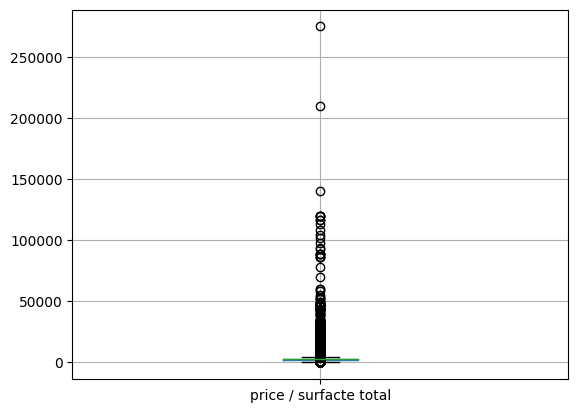

In [ ]:
df_train.boxplot("price / surfacte total")

In [ ]:
df_train = df_train.loc[(df_train["price / surfacte total"] <= 10000) & (df_train["price / surfacte total"] > 800)]

In [ ]:
df_train.drop(columns = "price / surfacte total", inplace = True)

<ipython-input-17-8eba0991b362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns = "price / surfacte total", inplace = True)


In [ ]:
df_train["bedrooms / rooms"] = df_train["bedrooms"] / df_train["rooms"]

<ipython-input-18-b500630a9105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["bedrooms / rooms"] = df_train["bedrooms"] / df_train["rooms"]


<Axes: >

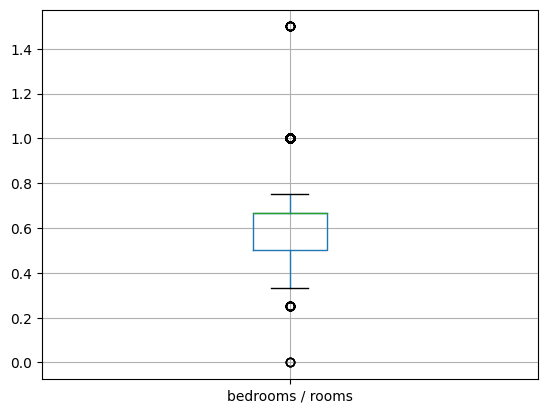

In [ ]:
df_train.boxplot("bedrooms / rooms")

In [ ]:
df_train.loc[df_train["bedrooms / rooms"] > 1].shape

(15, 25)

In [ ]:
df_train.loc[df_train["bedrooms / rooms"] == 0].shape

(4, 25)

In [ ]:
df_train = df_train.loc[(df_train["bedrooms / rooms"] <= 1) & (df_train["bedrooms / rooms"] > 0)]

In [ ]:
df_train.drop(columns = "bedrooms / rooms", inplace = True)

### pongo Nan

En vez de borrar dichas filas las reemplazo con Nan

In [ ]:
df_train[['surface_total', 'surface_covered']].isna().sum()

surface_total      0
surface_covered    0
dtype: int64

In [ ]:
df_test[['surface_total', 'surface_covered']].isna().sum()

surface_total      953
surface_covered    790
dtype: int64

In [ ]:
#Luego del analisis de los Boxplots de las variables realizamos los siguientes cortes
#Me quedo solo con las propiedades que tengan maximo 400 de 'surface_total' (en "'surface_total'" aparecen muchos NAN dsp veo como los resuelvo)
df_train.loc[((df_train['surface_total'] <= 20) | (df_train['surface_total'] >= 400)), ['surface_total']] = np.nan

df_test.loc[((df_test['surface_total'] <= 20) | (df_test['surface_total'] >= 400)), ['surface_total']] = np.nan


#Me quedo solo con las propiedades que tengan maximo 400 de 'surface_covered' (en "'surface_covered'" aparecen muchos NAN dsp veo como los resuelvo)
df_train.loc[((df_train['surface_covered'] <= 20) | (df_train['surface_covered'] >= 400)), ['surface_covered']] = np.nan

df_test.loc[((df_test['surface_covered'] <= 20) | (df_test['surface_covered'] >= 400)), ['surface_covered']] = np.nan

In [ ]:
df_train[['surface_total', 'surface_covered']].isna().sum()

surface_total      135
surface_covered    147
dtype: int64

In [ ]:
df_test[['surface_total', 'surface_covered']].isna().sum()

surface_total      1016
surface_covered     842
dtype: int64

In [ ]:
df_train.isna().sum()

ad_type                0
start_date             0
end_date               0
created_on             0
lat                 3349
lon                 3338
l1                     0
l2                     0
l3                   685
l4                 51113
l5                 55034
l6                 55034
rooms                  0
bedrooms               0
bathrooms              0
surface_total        135
surface_covered      147
price                  0
currency               0
price_period       39578
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

## EDA

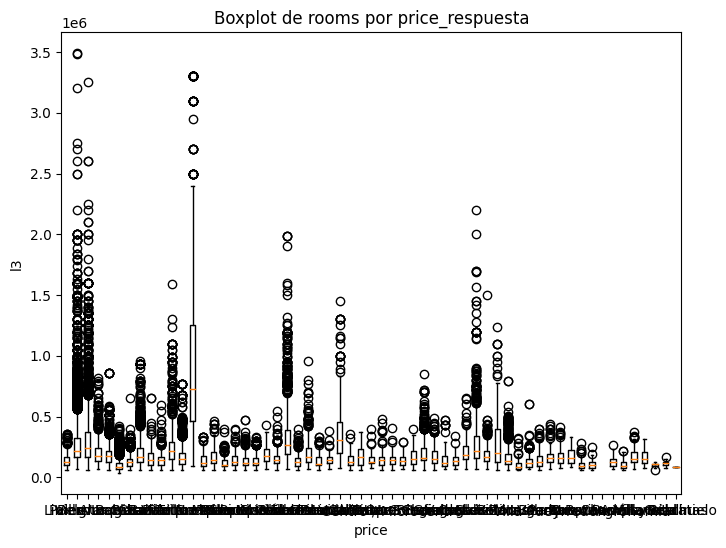

In [ ]:
  df_train_grupos = [df_train.loc[df_train['l3'] == t, "price"] for t in df_train['l3'].unique()]

  # Trazar los boxplots de cada grupo en un solo gráfico
  plt.figure(figsize=(8, 6))
  plt.boxplot(df_train_grupos, labels=df_train['l3'].unique())
  plt.xlabel('price')
  plt.ylabel("l3")
  plt.title('Boxplot de rooms por price_respuesta')
  plt.show()

<Axes: >

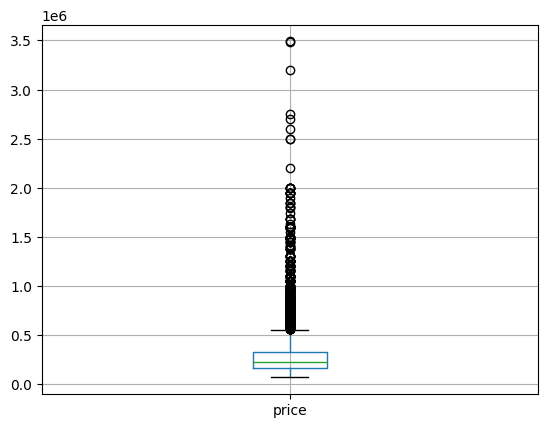

In [ ]:
df_train.loc[df_train["l3"] == "Palermo"].boxplot(column=["price"])

<Axes: >

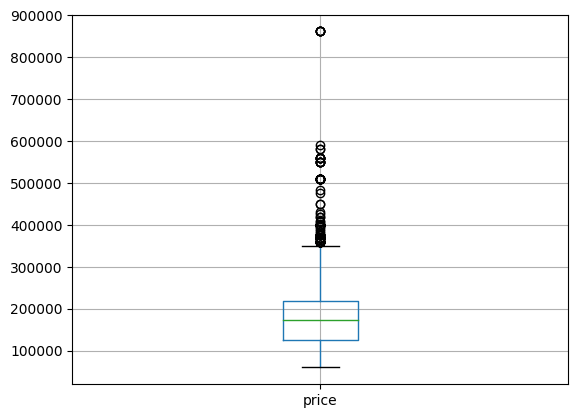

In [ ]:
df_train.loc[df_train["l3"] == "Almagro"].boxplot(column=["price"])

<Axes: >

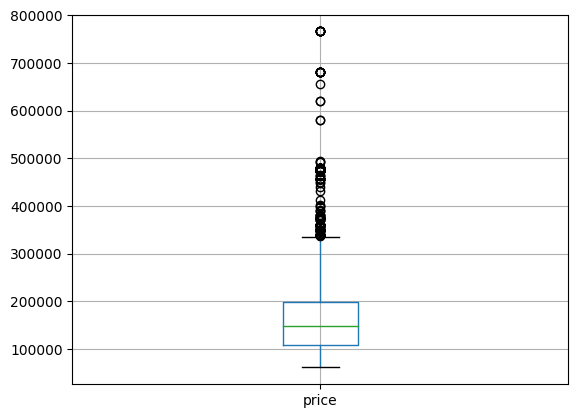

In [ ]:
df_train.loc[df_train["l3"] == "Villa Crespo"].boxplot(column=["price"])

<Axes: >

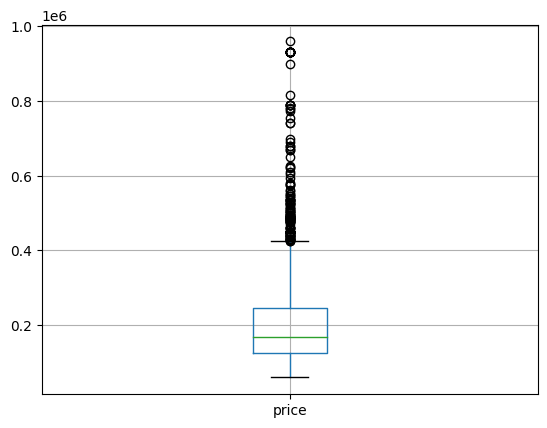

In [ ]:
df_train.loc[df_train["l3"] == "Caballito"].boxplot(column=["price"])

In [ ]:
df_train["l3"].value_counts()

Palermo                 9103
Almagro                 5544
Villa Crespo            5072
Belgrano                3759
Caballito               3702
Recoleta                2810
Villa Urquiza           1850
La Plata                1773
Barrio Norte            1705
Balvanera               1447
Flores                  1165
Nuñez                   1158
Puerto Madero           1073
Colegiales              1012
Parque Centenario        981
Villa del Parque         733
Villa Devoto             686
San Telmo                551
Saavedra                 548
San Cristobal            538
Parque Chacabuco         504
Boedo                    478
Once                     471
Chacarita                465
Floresta                 459
Monserrat                422
Paternal                 412
San Nicolás              375
Retiro                   365
Villa Pueyrredón         365
Congreso                 363
Liniers                  317
Coghlan                  315
Villa Luro               313
Las Cañitas   

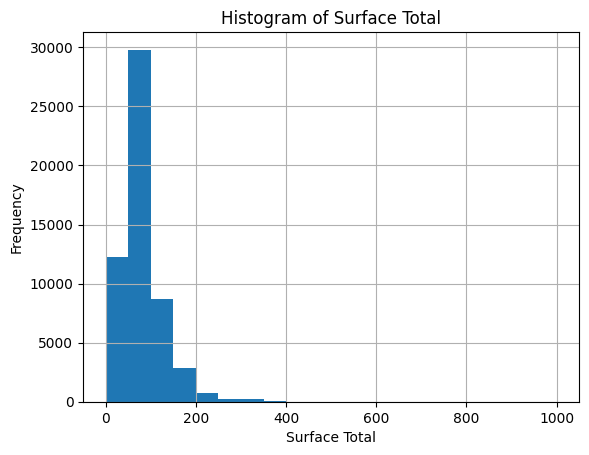

In [ ]:
df_train.hist(column=["surface_total"], bins=20, range=(0, 1000))
plt.xlabel("Surface Total")
plt.ylabel("Frequency")
plt.title("Histogram of Surface Total")
plt.show()

<Axes: >

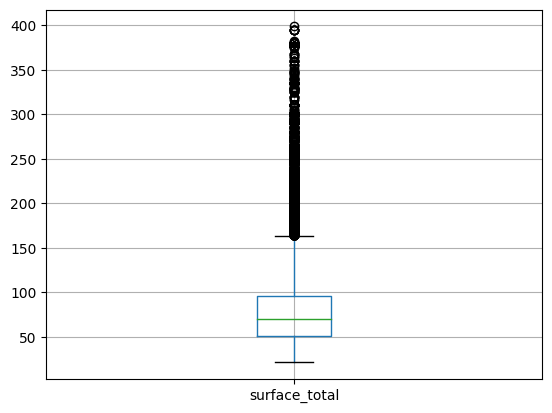

In [ ]:
df_train.boxplot(column=["surface_total"])

<Axes: >

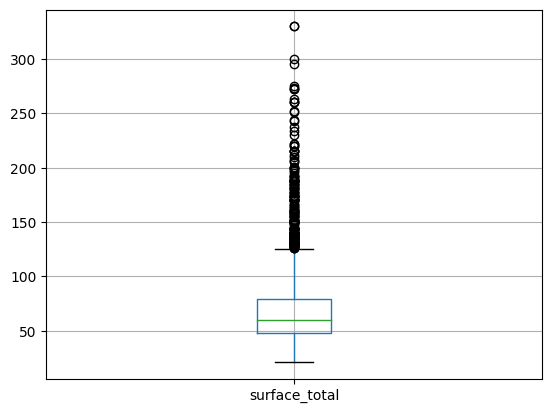

In [ ]:
df_test.boxplot(column=["surface_total"])

<Axes: >

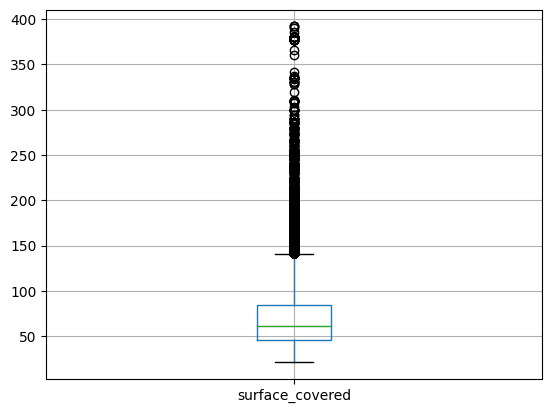

In [ ]:
df_train.boxplot(column=["surface_covered"])

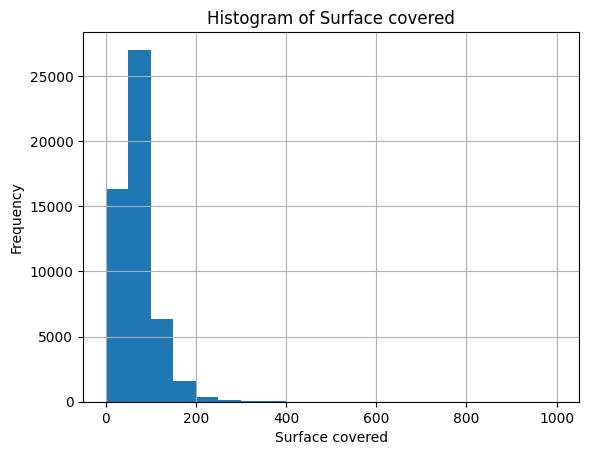

In [ ]:
df_train.hist(column=["surface_covered"], bins=20, range=(0, 1000))
plt.xlabel("Surface covered")
plt.ylabel("Frequency")
plt.title("Histogram of Surface covered")
plt.show()

<Axes: >

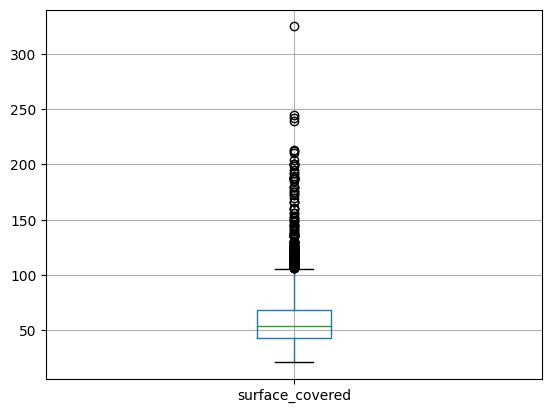

In [ ]:
df_test.boxplot(column=["surface_covered"])

<Axes: >

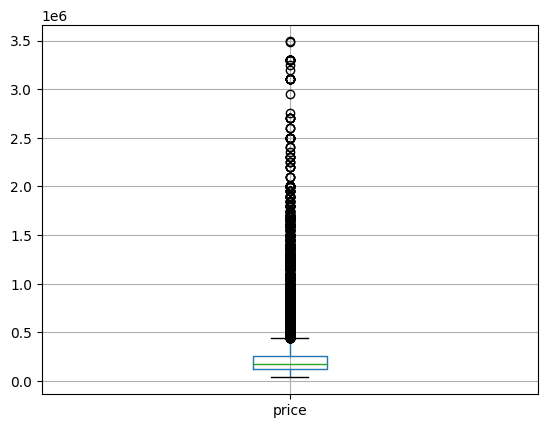

In [ ]:
df_train.boxplot(column=["price"])

In [ ]:
df_train.loc[(df_train['l2'] == "Capital Federal") & (df_train['price'] <250000)].shape

(39123, 24)

In [ ]:
df_train.loc[(df_train['l2'] == "Capital Federal")].shape

(53261, 24)

<Axes: >

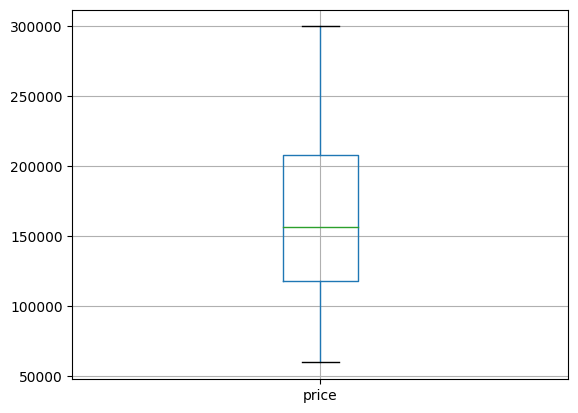

In [ ]:
df_train.loc[(df_train['l2'] == "Capital Federal") & (df_train['price'] < 300000)].boxplot(column=["price"])

## Creación de columnas


###precio/superfice por ciudad

In [ ]:
#Creo una columna con el promedio de precio/superfice por ciudad
df_train_groupded_by_ciudad = df_train[["l3", "surface_total", "price"]].groupby( by = "l3", dropna = True).mean()
df_train_groupded_by_ciudad["price/suface_total x ciudad"] = df_train_groupded_by_ciudad["price"] / df_train_groupded_by_ciudad["surface_total"]
df_train_groupded_by_ciudad.drop(	columns = ['surface_total', "price"], inplace = True)
df_train_groupded_by_ciudad.head(2)


,price/suface_total x ciudad
l3,
Abasto,2326.053866
Agronomía,2136.957019


In [ ]:
df_train = df_train.join(df_train_groupded_by_ciudad,
              on ='l3',
              how ='left')

In [ ]:
df_test = df_test.join(df_train_groupded_by_ciudad,
              on ='l3',
              how ='left')

### Precio/rooms por ciudad

In [ ]:
#Creo una columna con el promedio de precio/rooms por ciudad
df_train_groupded_by_ciudad = df_train[["l3", "rooms", "price"]].groupby( by = "l3", dropna = True).mean()
df_train_groupded_by_ciudad["price/rooms x ciudad"] = df_train_groupded_by_ciudad["price"] / df_train_groupded_by_ciudad["rooms"]
df_train_groupded_by_ciudad.drop(	columns = ['rooms', "price"], inplace = True)
df_train_groupded_by_ciudad.head(2)

,price/rooms x ciudad
l3,
Abasto,55425.705307
Agronomía,60830.424242


In [ ]:
df_train = df_train.join(df_train_groupded_by_ciudad,
              on ='l3',
              how ='left')

In [ ]:
df_test = df_test.join(df_train_groupded_by_ciudad,
              on ='l3',
              how ='left')

### Sup_Covered /total

In [ ]:
#
df_train["sup_coverted / total"] = df_train["surface_covered"] / df_train["surface_total"]

df_test["sup_coverted / total"] = df_test["surface_covered"] / df_test["surface_total"]

### RE

In [ ]:
patron = "(frente|contrafrente)"
df_train.loc[:,"frente"] = df_train.description.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"frente"] = df_test.description.str.contains(patron, re.IGNORECASE)

<ipython-input-46-27d219fa132b>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"frente"] = df_train.description.str.contains(patron, re.IGNORECASE)
<ipython-input-46-27d219fa132b>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"frente"] = df_test.description.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(cochera(s)?)"
df_train.loc[:,"cochera"] = df_train.description.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"cochera"] = df_test.description.str.contains(patron, re.IGNORECASE)

<ipython-input-47-4cdaf5c575f1>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"cochera"] = df_train.description.str.contains(patron, re.IGNORECASE)
<ipython-input-47-4cdaf5c575f1>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"cochera"] = df_test.description.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(amenitie(s)?|amenity)"
df_train.loc[:,"amenities"] = df_train.description.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"amenities"] = df_test.description.str.contains(patron, re.IGNORECASE)

<ipython-input-48-d24320a4c02c>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"amenities"] = df_train.description.str.contains(patron, re.IGNORECASE)
<ipython-input-48-d24320a4c02c>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"amenities"] = df_test.description.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(duplex)"
df_train.loc[:,"duplex"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"duplex"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-49-c3f2e48bfa7e>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"duplex"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-49-c3f2e48bfa7e>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"duplex"] = df_test.title.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(Madero Center)"
df_train.loc[:,"Madero Center"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"Madero Center"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-50-5ab43a08164e>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"Madero Center"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-50-5ab43a08164e>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"Madero Center"] = df_test.title.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(TORRE RENOIR)"
df_train.loc[:,"TORRE RENOIR"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"TORRE RENOIR"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-51-6f7f994ba4f4>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"TORRE RENOIR"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-51-6f7f994ba4f4>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"TORRE RENOIR"] = df_test.title.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(Alvear Tower)"
df_train.loc[:,"Alvear Tower"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"Alvear Tower"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-52-c95d52a000a7>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"Alvear Tower"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-52-c95d52a000a7>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"Alvear Tower"] = df_test.title.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(semipiso)"
df_train.loc[:,"semipiso"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"semipiso"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-53-bfeefc677169>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"semipiso"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-53-bfeefc677169>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"semipiso"] = df_test.title.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(suit)"
df_train.loc[:,"suit"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"suit"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-54-2fcbeb9d5eb8>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"suit"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-54-2fcbeb9d5eb8>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"suit"] = df_test.title.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(torre)"
df_train.loc[:,"torre"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"torre"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-55-deeaa7675dd5>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"torre"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-55-deeaa7675dd5>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"torre"] = df_test.title.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(sum)"
df_train.loc[:,"sum"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"sum"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-56-ac12e67b1f83>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"sum"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-56-ac12e67b1f83>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"sum"] = df_test.title.str.contains(patron, re.IGNORECASE)


In [ ]:
patron = "(pileta)"
df_train.loc[:,"pileta"] = df_train.title.str.contains(patron, re.IGNORECASE)

df_test.loc[:,"pileta"] = df_test.title.str.contains(patron, re.IGNORECASE)

<ipython-input-57-e3430cb803e8>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train.loc[:,"pileta"] = df_train.title.str.contains(patron, re.IGNORECASE)
<ipython-input-57-e3430cb803e8>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test.loc[:,"pileta"] = df_test.title.str.contains(patron, re.IGNORECASE)


## Eliminación de columnas

In [ ]:
columns = ['ad_type', "start_date", "end_date", "created_on", "l5", "l6", "currency", "price_period",
       'title', 'description', 'operation_type']


df_train.drop(columns= columns, inplace = True)
df_test.drop(columns= columns, inplace = True)

## Imputación de datos SMOTE

### Analisis previo

In [ ]:
from itertools import groupby
resumen = df_train.loc[(df_train["l2"] == "Capital Federal") & (df_train["l3"] != 0)].groupby(by = "l3")["price","surface_covered"].mean().sort_values(by = "price")

resumen["price/surface_covered"] = resumen["price"] / resumen["surface_covered"]

resumen.sort_values(by = "price/surface_covered")

<ipython-input-59-5a94edb73efa>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resumen = df_train.loc[(df_train["l2"] == "Capital Federal") & (df_train["l3"] != 0)].groupby(by = "l3")["price","surface_covered"].mean().sort_values(by = "price")


,price,surface_covered,price/surface_covered
l3,,,
Villa Lugano,101994.738220,66.757895,1527.830358
Villa Soldati,101750.000000,66.000000,1541.666667
Pompeya,108557.971014,66.608696,1629.786771
Constitución,104577.152318,63.536424,1645.940171
Boca,105372.692308,62.993590,1672.752620
Parque Avellaneda,131056.593407,73.556818,1781.705580
Villa Riachuelo,118499.875000,66.375000,1785.308851
Parque Patricios,138996.156398,68.886256,2017.763261
San Cristobal,132429.821561,65.405607,2024.747215


In [ ]:
# "price/surface_covered" entre 1300 y 2000
bajos = list(resumen.loc[resumen["price/surface_covered"] <= 2000].index)


# "price/surface_covered" entre 2000 y 3200
medios = list(resumen.loc[(resumen["price/surface_covered"] > 2000) & (resumen["price/surface_covered"] <= 3200)].index)


# "price/surface_covered" entre 3200 y 4000
altos = list(resumen.loc[(resumen["price/surface_covered"] > 3200) & (resumen["price/surface_covered"] <= 4000)].index)

# Luego analizo Las Cañitas y Puerto Madero por separado

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Initialize the MICE imputer and fit it to your data
imputer = IterativeImputer(max_iter=10, random_state=42)  # tiene add_indicator
num_cols= list(df_train.select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool', "category"]).columns)

### Capital Federal - bajos

In [ ]:
df_train_imp = df_train.loc[df_train["l3"].isin(bajos), num_cols]
imputer.fit(df_train_imp)

# Imputo nan en el set de entrenamiento
df_imputed_train = imputer.transform(df_train_imp)
df_train.loc[df_train["l3"].isin(bajos), num_cols] = df_imputed_train

# Imputo nan en el set de testo
df_test_imp = df_test.loc[df_test["l3"].isin(bajos), num_cols]
df_imputed_test = imputer.transform(df_test_imp)
df_test.loc[df_test["l3"].isin(bajos), num_cols] = df_imputed_test

### Capital Federal - medios

In [ ]:
df_train_imp = df_train.loc[df_train["l3"].isin(medios), num_cols]
imputer.fit(df_train_imp)

# Imputo nan en el set de entrenamiento
df_imputed_train = imputer.transform(df_train_imp)
df_train.loc[df_train["l3"].isin(medios), num_cols] = df_imputed_train

# Imputo nan en el set de testo
df_test_imp = df_test.loc[df_test["l3"].isin(medios), num_cols]
df_imputed_test = imputer.transform(df_test_imp)
df_test.loc[df_test["l3"].isin(medios), num_cols] = df_imputed_test

### Capital Federal - altos

In [ ]:
df_train_imp = df_train.loc[df_train["l3"].isin(altos), num_cols]
imputer.fit(df_train_imp)

# Imputo nan en el set de entrenamiento
df_imputed_train = imputer.transform(df_train_imp)
df_train.loc[df_train["l3"].isin(altos), num_cols] = df_imputed_train

# Imputo nan en el set de testo
df_test_imp = df_test.loc[df_test["l3"].isin(altos), num_cols]
df_imputed_test = imputer.transform(df_test_imp)
df_test.loc[df_test["l3"].isin(altos), num_cols] = df_imputed_test

### Las cañitas

In [ ]:
df_train_imp = df_train.loc[(df_train["l3"] == "Las Cañitas"), num_cols]
imputer.fit(df_train_imp)

# Imputo nan en el set de entrenamiento
df_imputed_train = imputer.transform(df_train_imp)
df_train.loc[(df_train["l3"] == "Las Cañitas"), num_cols] = df_imputed_train

# Imputo nan en el set de testo
df_test_imp = df_test.loc[(df_test["l3"] == "Las Cañitas"), num_cols]
df_imputed_test = imputer.transform(df_test_imp)
df_test.loc[(df_test["l3"] == "Las Cañitas"), num_cols] = df_imputed_test

### Puerto Madero

In [ ]:
df_train_imp = df_train.loc[(df_train["l3"] == "Puerto Madero"), num_cols]
imputer.fit(df_train_imp)

# Imputo nan en el set de entrenamiento
df_imputed_train = imputer.transform(df_train_imp)
df_train.loc[(df_train["l3"] == "Puerto Madero"), num_cols] = df_imputed_train

# Imputo nan en el set de testo
df_test_imp = df_test.loc[(df_test["l3"] == "Puerto Madero"), num_cols]
df_imputed_test = imputer.transform(df_test_imp)
df_test.loc[(df_test["l3"] == "Puerto Madero"), num_cols] = df_imputed_test

### Bs.As. G.B.A. Zona Sur

In [ ]:
df_train_imp = df_train.loc[(df_train["l2"] == "Bs.As. G.B.A. Zona Sur") & (df_train["l3"].notna()), num_cols]
imputer.fit(df_train_imp)

# Imputo nan en el set de entrenamiento
df_imputed_train = imputer.transform(df_train_imp)
df_train.loc[(df_train["l2"] == "Bs.As. G.B.A. Zona Sur") & ((df_train["l3"].notna())), num_cols] = df_imputed_train

# Imputo nan en el set de testo
df_test_imp = df_test.loc[(df_test["l2"] == "Bs.As. G.B.A. Zona Sur") & ((df_test["l3"].notna())), num_cols]
df_imputed_test = imputer.transform(df_test_imp)
df_test.loc[(df_test["l2"] == "Bs.As. G.B.A. Zona Sur") & ((df_test["l3"].notna())), num_cols] = df_imputed_test

### Sin ciudad

con estos voy a entrenar con todos los datos ya que daban bien

In [ ]:
df_train_imp = df_train.loc[:, num_cols]
imputer.fit(df_train_imp)

# Imputo nan en el set de entrenamiento
df_imputed_train = imputer.transform(df_train.loc[df_train["l3"].isna(), num_cols])
df_train.loc[df_train["l3"].isna(), num_cols] = df_imputed_train

# Imputo nan en el set de testo
df_test_imp = df_test.loc[df_test["l3"].isna(), num_cols]
df_imputed_test = imputer.transform(df_test_imp)
df_test.loc[df_test["l3"].isna(), num_cols] = df_imputed_test

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Elimnación de filas 2


In [ ]:
df_train["price / surfacte total"] = df_train["price"] / df_train["surface_total"]

### Capital Federal - Altos

<Axes: >

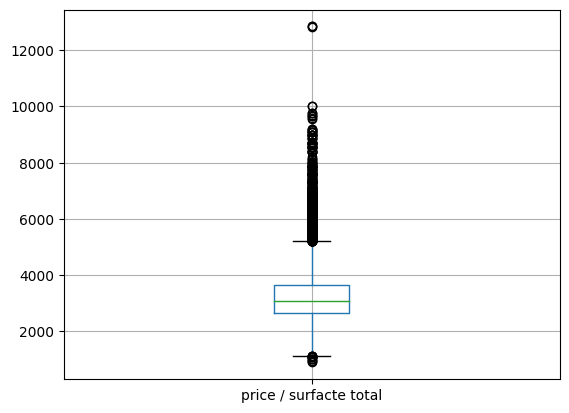

In [ ]:
df_train.loc[df_train["l3"].isin(altos)].boxplot("price / surfacte total")

In [ ]:
df_train.loc[(df_train["l3"].isin(altos))].shape

(18900, 29)

In [ ]:
df_train.loc[(df_train["l3"].isin(altos)) & (df_train["price / surfacte total"] > 6000)].shape

(511, 29)

In [ ]:
df_train.loc[(df_train["l3"].isin(altos))]["price / surfacte total"].sort_values(ascending = True)

id
210252      892.857143
64563       934.065934
973744      947.368421
118370     1004.794521
117459     1032.352941
              ...     
287638    10000.000000
111445    10000.000000
579320    12814.687495
280371    12845.472048
608269    12845.472048
Name: price / surfacte total, Length: 18900, dtype: float64

In [ ]:
df_train.loc[(df_train["l3"].isin(altos)) & (df_train["price / surfacte total"] < 1500)].shape

(84, 29)

In [ ]:
df_train.loc[(df_train["l3"].isin(altos)) & (df_train["price / surfacte total"] > 6000)]["price / surfacte total"].sort_values(ascending = True)

id
577945     6001.980769
71971      6015.037594
298982     6018.230769
778590     6018.518519
693101     6020.408163
              ...     
287638    10000.000000
111445    10000.000000
579320    12814.687495
280371    12845.472048
608269    12845.472048
Name: price / surfacte total, Length: 511, dtype: float64

In [ ]:
df_train.loc[df_train["l3"].isin(altos)] = df_train.loc[df_train["l3"].isin(altos) & (df_train["price / surfacte total"] <= 6000) & (df_train["price / surfacte total"] > 1500)]

### Las Cañitas


<Axes: >

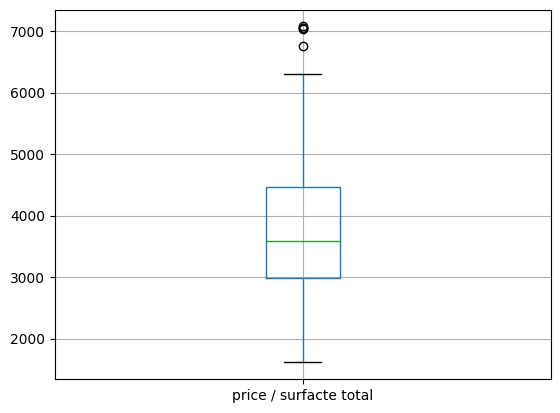

In [ ]:
df_train.loc[(df_train["l3"] == "Las Cañitas")].boxplot("price / surfacte total")

In [ ]:
df_train.loc[((df_train["l3"] == "Las Cañitas"))].shape

(306, 29)

In [ ]:
df_train.loc[(df_train["l3"] == "Las Cañitas") & (df_train["price / surfacte total"] > 6000)].shape

(15, 29)

In [ ]:
df_train.loc[(df_train["l3"] == "Las Cañitas")] = df_train.loc[(df_train["l3"] == "Las Cañitas") & (df_train["price / surfacte total"] <= 6000)]

### Puerto Madero

<Axes: >

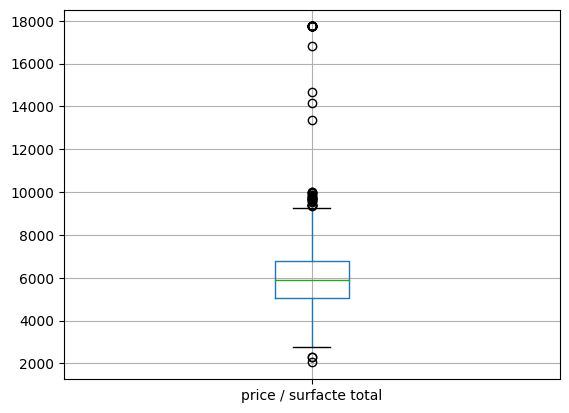

In [ ]:
df_train.loc[(df_train["l3"] == "Puerto Madero")].boxplot("price / surfacte total")

In [ ]:
df_train.loc[(df_train["l3"] == "Puerto Madero")].shape

(1073, 29)

In [ ]:
df_train.loc[(df_train["l3"] == "Puerto Madero") & (df_train["price / surfacte total"] > 9000)].shape

(62, 29)

In [ ]:
df_train.loc[(df_train["l3"] == "Puerto Madero")]["price / surfacte total"].sort_values(ascending = True)

id
184609     2045.431818
47161      2289.156627
47162      2307.692308
228122     2761.627907
464306     2916.666667
              ...     
634270    17732.908062
674670    17732.908062
989151    17732.908062
989140    17732.908062
989129    17732.908062
Name: price / surfacte total, Length: 1073, dtype: float64

In [ ]:
df_train.loc[(df_train["l3"] == "Puerto Madero") & (df_train["price / surfacte total"] < 3000)].shape

(7, 29)

In [ ]:
df_train.loc[(df_train["l3"] == "Puerto Madero")] = df_train.loc[(df_train["l3"] == "Puerto Madero") & (df_train["price / surfacte total"] <= 9000) & (df_train["price / surfacte total"] > 3000)]

In [ ]:
df_train.drop(columns = "price / surfacte total", inplace = True)

## Selección de columnas

In [ ]:
df_train.columns

Index(['lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'property_type',
       'price/suface_total x ciudad', 'price/rooms x ciudad',
       'sup_coverted / total', 'frente', 'cochera', 'amenities', 'duplex',
       'Madero Center', 'TORRE RENOIR', 'Alvear Tower', 'semipiso', 'suit',
       'torre', 'sum', 'pileta'],
      dtype='object')

In [ ]:
columns = ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type', 'price/suface_total x ciudad',
       'price/rooms x ciudad', 'sup_coverted / total', 'frente', 'cochera',
       'amenities', "l2", "l3", 'duplex', 'Madero Center', 'TORRE RENOIR', 'Alvear Tower', 'semipiso', 'suit',
       'torre', 'sum', 'pileta']



df_train = df_train[columns]
df_test = df_test[columns]

## --

In [ ]:
# ## esto tiene que hacerse antes y mejor
df_train.fillna(0, inplace=True, downcast= "infer")
df_test.fillna(0, inplace=True, downcast= "infer")

In [ ]:
# Funcion de limpieza (usada en la siguiente sección) que usa y_train
def limpiar_fold(X_train, y_train, X_test):
    ## TODO: limpiar los datos

    return (X_train, y_train, X_test)

##Transformación de columnas

In [ ]:
df_train[['frente', 'cochera', 'amenities', 'duplex', 'Madero Center',
       'TORRE RENOIR', 'Alvear Tower', 'semipiso', 'suit', 'torre', 'sum',
       'pileta']] = df_train[['frente', 'cochera', 'amenities', 'duplex', 'Madero Center',
       'TORRE RENOIR', 'Alvear Tower', 'semipiso', 'suit', 'torre', 'sum',
       'pileta']].astype("int")

In [ ]:
df_train["rooms"] = df_train["rooms"].astype("int").replace(0,1)
df_test["rooms"] = df_test["rooms"].astype("int").replace(0,1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train.loc[df_train['property_type'] == 0, ['property_type']] = "Departamento"

In [ ]:
labelencoder = LabelEncoder()
df_train['property_type'] = labelencoder.fit_transform(df_train['property_type'])

df_test['property_type'] = labelencoder.fit_transform(df_test['property_type'])

# Entrenamiento del modelo

Creo 7 modelos en función de las zonas geofricas con similiar price/m2 ("Provincias" ("l2")).
* Capital Federal - bajos
* Capital Federal - medios
* Capital Federal - altos
* Las canitas
* Puerto Madero
* Bs.As. G.B.A. Zona Sur
* Sin ciudad

## Modelo Para Capital Federal - bajos

In [ ]:
# Datos para probar
df_train_1 = df_train.loc[df_train["l3"].isin(bajos)].select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

df_train_1.drop(columns = ['Madero Center', 'TORRE RENOIR', 'Alvear Tower'] , inplace = True)

X = df_train_1[df_train_1.columns.drop('price')]
y = df_train_1['price']

In [ ]:
params_grid = {'max_depth': [3, 5 , 10],
               'n_estimators': [100, 300, 500]}


kfoldcv = KFold(n_splits=10)
GB = GradientBoostingRegressor(random_state = 42)
# scorer_fn = make_scorer(mean_squared_error)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
reg_1 = GridSearchCV(estimator=GB,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv)
reg_1.fit(X,y);

In [ ]:
print('Mejores hiperparámetros:', reg_1.best_params_)
print('mean_absolute_error:', reg_1.best_score_)

Mejores hiperparámetros: {'max_depth': 20, 'n_estimators': 500}
mean_absolute_error: 31780.120622807764


In [ ]:
reg_1 = reg_1.best_estimator_

## Modelo Para Capital Federal - medios

In [ ]:
# Datos para probar
df_train_2 = df_train.loc[df_train["l3"].isin(medios)].select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

df_train_2.drop(columns = ['Madero Center', 'TORRE RENOIR', 'Alvear Tower'] , inplace = True)

X = df_train_2[df_train_2.columns.drop('price')]
y = df_train_2['price']

In [ ]:
params_grid = {'max_depth': [3, 5 , 10],
               'n_estimators': [100, 300, 500]}


kfoldcv = KFold(n_splits=10)
GB = GradientBoostingRegressor(random_state = 42)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
reg_2 = GridSearchCV(estimator=GB,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv)
reg_2.fit(X,y);

In [ ]:
print('Mejores hiperparámetros:', reg_2.best_params_)
print('mean_absolute_error:', reg_2.best_score_)

Mejores hiperparámetros: {'max_depth': 30, 'n_estimators': 350}
mean_absolute_error: 38401.58095209727


In [ ]:
reg_2 = reg_2.best_estimator_

## Modelo Para Capital Federal - altos

In [ ]:
# Datos para probar
df_train_3 = df_train.loc[df_train["l3"].isin(altos)].select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

df_train_3.drop(columns = ['Madero Center', 'TORRE RENOIR', 'Alvear Tower'] , inplace = True)

X = df_train_3[df_train_3.columns.drop('price')]
y = df_train_3['price']

In [ ]:
params_grid = {'max_depth': [3, 5 , 10],
               'n_estimators': [100, 300, 500]}

kfoldcv = KFold(n_splits=10)
GB = GradientBoostingRegressor(random_state = 42)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
reg_3 = GridSearchCV(estimator=GB,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv)
reg_3.fit(X,y);

In [ ]:
print('Mejores hiperparámetros:', reg_3.best_params_)
print('mean_absolute_error:', reg_3.best_score_)

Mejores hiperparámetros: {'max_depth': 30, 'n_estimators': 350}
mean_absolute_error: 67851.57537430731


In [ ]:
reg_3 = reg_3.best_estimator_

## Modelo Para Las Cañitas

In [ ]:
# Datos para probar
df_train_4 = df_train.loc[(df_train["l3"] == "Las Cañitas")].select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

df_train_4.drop(columns = ['Madero Center', 'TORRE RENOIR', 'Alvear Tower', "lat", "lon"] , inplace = True)

X = df_train_4[df_train_4.columns.drop('price')]
y = df_train_4['price']

In [ ]:
params_grid = {'max_depth': [3, 5 , 10],
               'n_estimators': [100, 300, 500]}

kfoldcv = KFold(n_splits=5)
GB = GradientBoostingRegressor(random_state = 42)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
reg_4 = GridSearchCV(estimator=GB,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv)
reg_4.fit(X,y);

In [ ]:
print('Mejores hiperparámetros:', reg_4.best_params_)
print('mean_absolute_error:', reg_4.best_score_)

Mejores hiperparámetros: {'max_depth': 30, 'n_estimators': 350}
mean_absolute_error: 114493.04182436592


In [ ]:
reg_4 = reg_4.best_estimator_

## Modelo Para  Puerto Madero

In [ ]:
# Datos para probar
df_train_5 = df_train.loc[(df_train["l3"] == "Puerto Madero")].select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

df_train_5.drop(columns = ["lat", "lon"] , inplace = True)

X = df_train_5[df_train_5.columns.drop('price')]
y = df_train_5['price']

In [ ]:
params_grid = {'max_depth': [3, 5 , 10],
               'n_estimators': [100, 300, 500]}


kfoldcv = KFold(n_splits=5)
GB = GradientBoostingRegressor(random_state = 42)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
reg_5 = GridSearchCV(estimator=GB,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv)
reg_5.fit(X,y);

In [ ]:
print('Mejores hiperparámetros:', reg_5.best_params_)
print('mean_absolute_error:', reg_5.best_score_)

Mejores hiperparámetros: {'max_depth': 20, 'n_estimators': 350}
mean_absolute_error: 150197.40143452212


In [ ]:
reg_5 = reg_5.best_estimator_

## Bs.As. G.B.A. Zona Sur

In [ ]:
# Datos para probar
df_train_6 = df_train.loc[(df_train["l2"] == "Bs.As. G.B.A. Zona Sur") & ((df_train["l3"] != 0))].select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

df_train_6.drop(columns = ['Madero Center', 'TORRE RENOIR', 'Alvear Tower'] , inplace = True)

X = df_train_6[df_train_6.columns.drop('price')]
y = df_train_6['price']

In [ ]:
params_grid = {'max_depth': [3, 5 , 10],
               'n_estimators': [100, 300, 500]}


kfoldcv = KFold(n_splits=10)
GB = GradientBoostingRegressor(random_state = 42)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
reg_6 = GridSearchCV(estimator=GB,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv)
reg_6.fit(X,y);

In [ ]:
print('Mejores hiperparámetros:', reg_6.best_params_)
print('mean_absolute_error:', reg_6.best_score_)

Mejores hiperparámetros: {'max_depth': 30, 'n_estimators': 500}
mean_absolute_error: 36664.43622644104


In [ ]:
reg_6 = reg_6.best_estimator_

## Modelo Para Sin ciudad

In [ ]:
# Datos para probar
df_train_7 = df_train.loc[(df_train["l3"] == 0)].select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

df_train_7.drop(columns = ['Madero Center', 'TORRE RENOIR', 'Alvear Tower'] , inplace = True)

X = df_train_7[df_train_7.columns.drop('price')]
y = df_train_7['price']

In [ ]:
params_grid = {'max_depth': [3, 5 , 10],
               'n_estimators': [100, 300, 500]}


kfoldcv = KFold(n_splits=5)
GB = GradientBoostingRegressor(random_state = 42)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
reg_7 = GridSearchCV(estimator=GB,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv)
reg_7.fit(X,y);

In [ ]:
print('Mejores hiperparámetros:', reg_7.best_params_)
print('mean_absolute_error:', reg_7.best_score_)

Mejores hiperparámetros: {'max_depth': 30, 'n_estimators': 500}
mean_absolute_error: 37655.35999939479


In [ ]:
reg_7 = reg_7.best_estimator_

# Predicción para kaggle


## Predicción Modelo 1

In [ ]:
## Datos a predecir
X_1 = df_train_1[df_train_1.columns.drop('price')]
y_1 = df_train_1['price']
X_prueba_1 =  df_test.loc[df_test["l3"].isin(medios)][df_train_1.columns.drop('price')] # cuidado:

# Entrenamos el modelo con todos los datos
reg_1.fit(X_1, y_1)

# # Predecimos
# df_test.loc[df_test["l3"] != "La Plata", 'price'] = np.exp(reg_1.predict(X_prueba_1))

# Predecimos
df_test.loc[df_test["l3"].isin(medios), 'price'] = reg_1.predict(X_prueba_1)

In [ ]:
pd.DataFrame(zip(df_train.columns.drop('price'), reg_1.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
5,surface_total,0.518185
1,lon,0.102008
0,lat,0.092609
6,surface_covered,0.076079
10,sup_coverted / total,0.056673
4,bathrooms,0.055732
12,cochera,0.041118
9,price/rooms x ciudad,0.014287
8,price/suface_total x ciudad,0.013315
7,property_type,0.008429


## Predicción Modelo 2

In [ ]:
## Datos a predecir
X_2 = df_train_2[df_train_2.columns.drop('price')]
y_2 = df_train_2['price']
X_prueba_2 =  df_test.loc[df_test["l3"].isin(medios)][df_train_2.columns.drop('price')] # cuidado:

# Entrenamos el modelo con todos los datos
reg_2.fit(X_2, y_2)

# # Predecimos
# df_test.loc[df_test["l3"] != "La Plata", 'price'] = np.exp(reg_2.predict(X_prueba_2))

# Predecimos
df_test.loc[df_test["l3"].isin(medios), 'price'] = reg_2.predict(X_prueba_2)

In [ ]:
pd.DataFrame(zip(df_train.columns.drop('price'), reg_2.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
5,surface_total,0.527458
6,surface_covered,0.155528
4,bathrooms,0.061583
8,price/suface_total x ciudad,0.050239
1,lon,0.050023
0,lat,0.048669
10,sup_coverted / total,0.031482
9,price/rooms x ciudad,0.024017
7,property_type,0.014076
12,cochera,0.012469


## Predicción Modelo 3

In [ ]:
## Datos a predecir
X_3 = df_train_3[df_train_3.columns.drop('price')]
y_3 = df_train_3['price']
X_prueba_3 =  df_test.loc[df_test["l3"].isin(altos)][df_train_3.columns.drop('price')] # cuidado:


# Entrenamos el modelo con todos los datos
reg_3.fit(X_3, y_3)

# # Predecimos
# df_test.loc[df_test["l3"] != "La Plata", 'price'] = np.exp(reg_3.predict(X_prueba_3))

# Predecimos
df_test.loc[df_test["l3"].isin(altos), 'price'] = reg_3.predict(X_prueba_3)

In [ ]:
pd.DataFrame(zip(df_train.columns.drop('price'), reg_3.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
6,surface_covered,6.590772e-01
5,surface_total,1.532679e-01
1,lon,5.992764e-02
0,lat,4.719866e-02
10,sup_coverted / total,1.965517e-02
4,bathrooms,1.866523e-02
7,property_type,1.428671e-02
11,frente,5.978783e-03
13,amenities,4.689720e-03
12,cochera,4.196535e-03


## Predicción Modelo 4

In [ ]:
## Datos a predecir
X_4 = df_train_4[df_train_4.columns.drop('price')]
y_4 = df_train_4['price']
X_prueba_4 = df_test.loc[(df_test["l3"] == "Las Cañitas")][df_train_4.columns.drop('price')] # cuidado:

# Entrenamos el modelo con todos los datos
reg_4.fit(X_4, y_4)

# # Predecimos
# df_test.loc[df_test["l3"] == "La Plata", 'price'] = np.exp(reg_4.predict(X_prueba_4))

# Predecimos
df_test.loc[(df_test["l3"] == "Las Cañitas"), 'price'] = reg_4.predict(X_prueba_4)

In [ ]:
pd.DataFrame(zip(df_train.columns.drop('price'), reg_5.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
3,bedrooms,8.307547e-01
4,bathrooms,1.127590e-01
8,price/suface_total x ciudad,2.658818e-02
2,rooms,8.094403e-03
0,lat,6.127115e-03
11,frente,3.942739e-03
10,sup_coverted / total,3.854378e-03
9,price/rooms x ciudad,3.534352e-03
1,lon,1.690249e-03
17,Madero Center,1.426902e-03


## Predicción Modelo 5

In [ ]:
## Datos a predecir
X_5 = df_train_5[df_train_5.columns.drop('price')]
y_5 = df_train_5['price']
X_prueba_5 = df_test.loc[(df_test["l3"] == "Puerto Madero")][df_train_5.columns.drop('price')] # cuidado:

# Entrenamos el modelo con todos los datos
reg_5.fit(X_5, y_5)

# # Predecimos
# df_test.loc[df_test["l3"] == "La Plata", 'price'] = np.exp(reg_5.predict(X_prueba_5))

# Predecimos
df_test.loc[(df_test["l3"] == "Puerto Madero"), 'price'] = reg_5.predict(X_prueba_5)

In [ ]:
pd.DataFrame(zip(df_train.columns.drop('price'), reg_5.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
3,bedrooms,8.307547e-01
4,bathrooms,1.127590e-01
8,price/suface_total x ciudad,2.658818e-02
2,rooms,8.094403e-03
0,lat,6.127115e-03
11,frente,3.942739e-03
10,sup_coverted / total,3.854378e-03
9,price/rooms x ciudad,3.534352e-03
1,lon,1.690249e-03
17,Madero Center,1.426902e-03


## Predicción Modelo 6

In [ ]:
## Datos a predecir
X_6 = df_train_6[df_train_6.columns.drop('price')]
y_6 = df_train_6['price']
X_prueba_6 = df_test.loc[(df_test["l2"] == "Bs.As. G.B.A. Zona Sur") & ((df_test["l3"] != 0))][df_train_6.columns.drop('price')] # cuidado:


# Entrenamos el modelo con todos los datos
reg_6.fit(X_6, y_6)

# # Predecimos
# df_test.loc[df_test["l3"] == "La Plata", 'price'] = np.exp(reg_6.predict(X_prueba_6))

# Predecimos
df_test.loc[(df_test["l2"] == "Bs.As. G.B.A. Zona Sur") & ((df_test["l3"] != 0)), 'price'] = reg_6.predict(X_prueba_6)

In [ ]:
pd.DataFrame(zip(df_train.columns.drop('price'), reg_6.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
6,surface_covered,0.673481
1,lon,0.088785
0,lat,0.076366
5,surface_total,0.051795
7,property_type,0.030678
10,sup_coverted / total,0.021919
12,cochera,0.020810
4,bathrooms,0.014395
3,bedrooms,0.009062
2,rooms,0.007545


## Predicción Modelo 7

In [ ]:
## Datos a predecir
X_7 = df_train_7[df_train_7.columns.drop('price')]
y_7 = df_train_7['price']
X_prueba_7 = df_test.loc[(df_test["l3"] == 0)][df_train_7.columns.drop('price')] # cuidado:

# Entrenamos el modelo con todos los datos
reg_7.fit(X_7, y_7)

# # Predecimos
# df_test.loc[df_test["l3"] == "La Plata", 'price'] = np.exp(reg_7.predict(X_prueba_7))

# Predecimos
df_test.loc[(df_test["l3"] == 0), 'price'] = reg_7.predict(X_prueba_7)

In [ ]:
pd.DataFrame(zip(df_train.columns.drop('price'), reg_7.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
5,surface_total,2.815348e-01
0,lat,1.755277e-01
1,lon,1.274203e-01
6,surface_covered,1.243506e-01
4,bathrooms,9.651462e-02
10,sup_coverted / total,7.701489e-02
8,price/suface_total x ciudad,5.289304e-02
9,price/rooms x ciudad,3.216911e-02
3,bedrooms,1.563698e-02
2,rooms,9.338488e-03


## Grabamos

In [ ]:
# Grabamos
df_test['price'].to_csv('solucion18 C13_2M.csv', index=True)